**Boxplot**

- Box plot is used to identify the outliers
- Outlier is an observation having huge positive value or huge negative value
- Q1=25p, Q2= 50P and Q3=75p
- IQR = Inter Quartile Range = Q3-Q1
- Q3+1.5*IQR and Q1-1.5*IQR

In [69]:
# Read the prevailing wage data and lot the box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r'C:\Users\saina\Documents\DataScience\Datafiles\Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


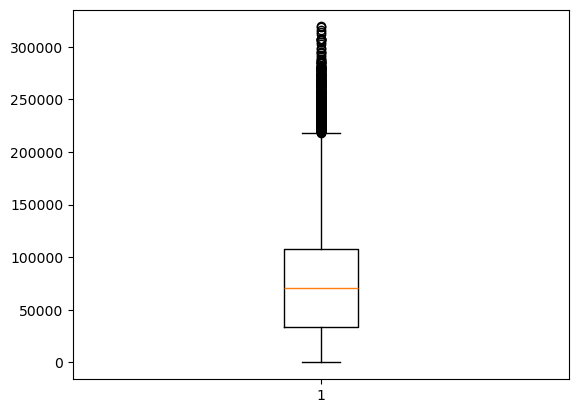

In [70]:
wage_data = visa_df['prevailing_wage']
plt.boxplot(wage_data)
plt.show()

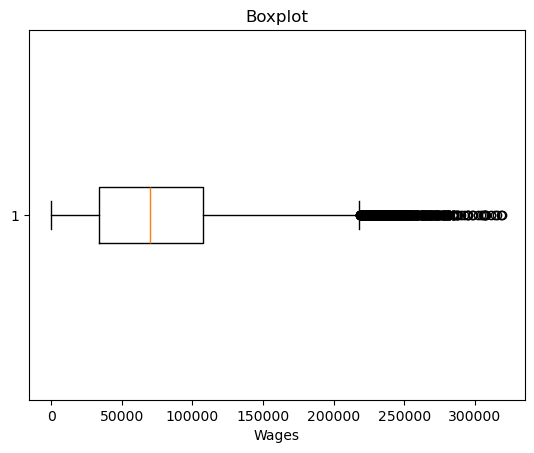

In [4]:
plt.boxplot(wage_data, vert=False)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

<Axes: >

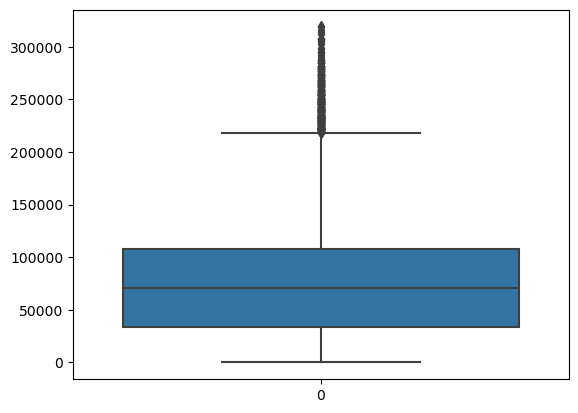

In [5]:
sns.boxplot(wage_data)

<Axes: >

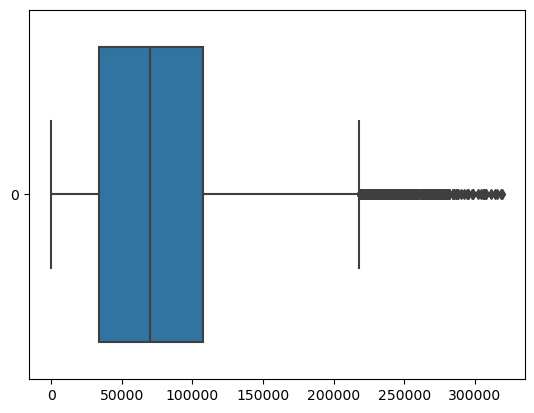

In [7]:
sns.boxplot(wage_data, orient='h')

**Plot the Histogram and Boxplot side by side**

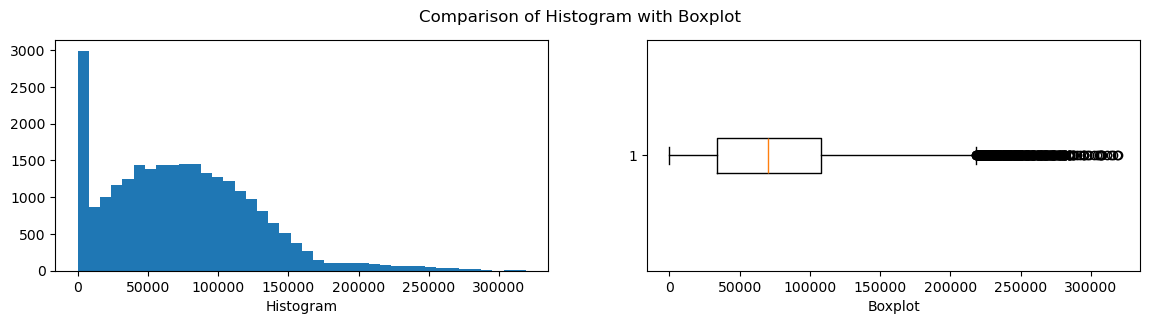

In [14]:
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=40)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data, vert=False)
plt.xlabel('Boxplot')
plt.show()

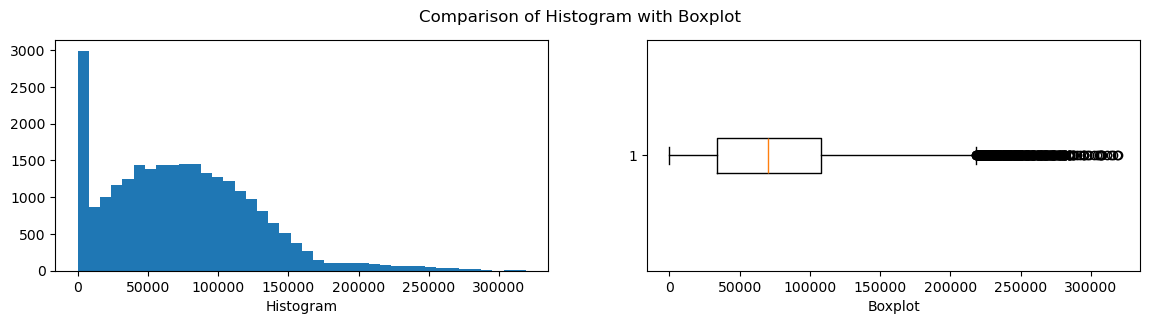

In [15]:
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=40)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data, vert=False)
plt.xlabel('Boxplot')
plt.show()

**Finding the Outliers**

- We already know that Outliers available less than Q1-1.5*IQR and Q3+1.5*IQR
- Step-1: 
    - Calculate Q1=25p
    - Calculate Q2=50P
    - Calculate Q3=75P
- Step-2:
    - Calculate IQR=Q3-Q1
- Step-3:
    - Calculate lower bound = Q1-1.5*IQR 
    - Calculate upper bound = Q3-1.5*IQR
- Step-4:
    - Condition1 = Wage_data < lb
    - Condition2 = Wage_data > ub
    - Condition3 = Condition1 OR Condition2

In [40]:
Q1 = np.percentile(wage_data,25)
Q2 = np.percentile(wage_data,50)
Q3 = np.percentile(wage_data,75)

IQR = Q3-Q1

lb = Q1-1.5*IQR
ub = Q3+1.5*IQR

cond1 = wage_data < lb
cond2 = wage_data > ub
out_cond3 = cond1 | cond2
outliers_data = visa_df[out_cond3]
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [29]:
non_outliers_data = visa_df[~cond3]
len(non_outliers_data)

25053

In [30]:
## Non Outliers DF 
Q1 = np.percentile(wage_data,25)
Q2 = np.percentile(wage_data,50)
Q3 = np.percentile(wage_data,75)

IQR = Q3-Q1

lb = Q1-1.5*IQR
ub = Q3+1.5*IQR

cond1 = wage_data > lb
cond2 = wage_data < ub
cond3 = cond1 & cond2
non_outliers_data = visa_df[cond3]
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- We have two dataframes
- visa_df: Total Data = 25480
- non_outliers_data = After removing outliers = 25053

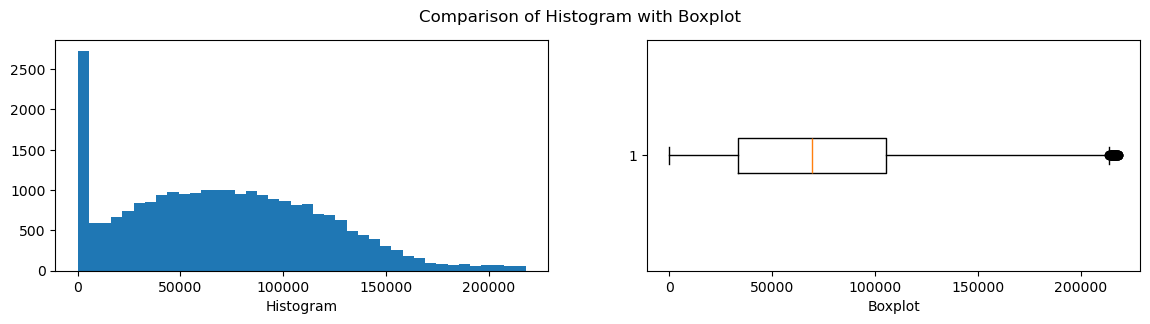

In [37]:
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'],bins=40)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'], vert=False)
plt.xlabel('Boxplot')
plt.show()

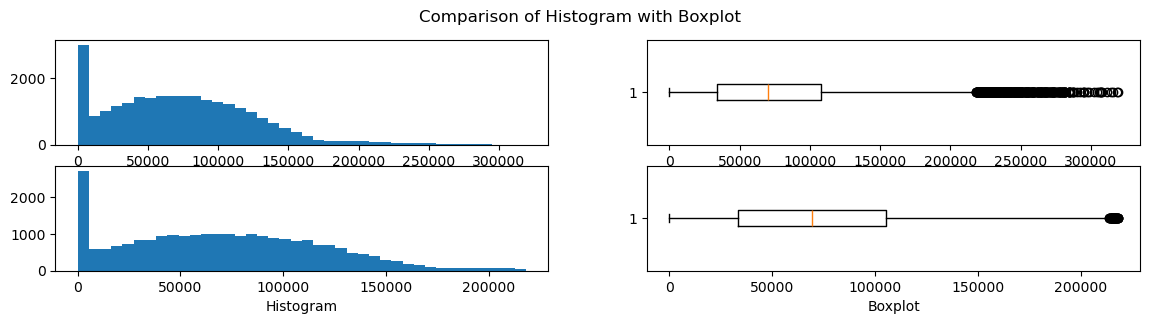

In [38]:
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data,bins=40)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data, vert=False)
plt.xlabel('Boxplot')
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'],bins=40)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'], vert=False)
plt.xlabel('Boxplot')
plt.show()

In [60]:
# Fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with median value
# again draw the plots

wage_median = round(visa_df['prevailing_wage'].median(),2)

In [61]:
visa_df[out_cond3]['prevailing_wage']

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [62]:
out_keys = visa_df[out_cond3]['prevailing_wage'].keys()

In [65]:
for i in out_keys:
    visa_df.iloc[i,[8]] = wage_median

In [66]:
visa_df[out_cond3]['prevailing_wage']

14       70308.21
34       70308.21
130      70308.21
216      70308.21
221      70308.21
           ...   
25191    70308.21
25195    70308.21
25468    70308.21
25469    70308.21
25476    70308.21
Name: prevailing_wage, Length: 427, dtype: float64

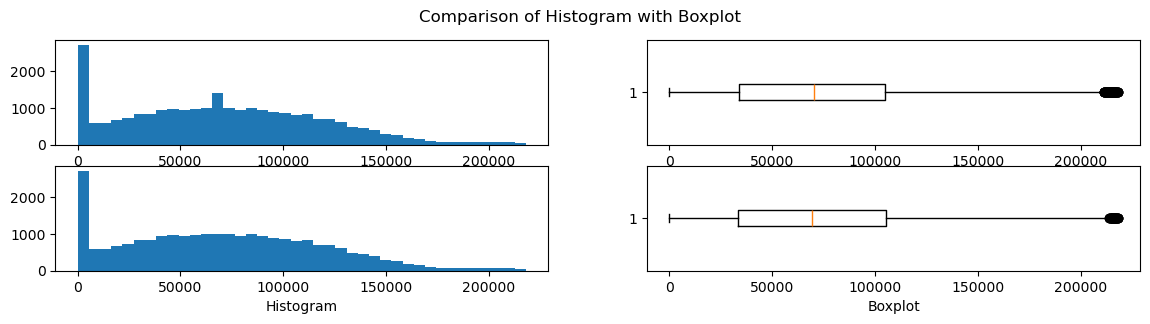

In [68]:
wage_data_fill_median = visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparison of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_fill_median,bins=40)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_fill_median, vert=False)
plt.xlabel('Boxplot')
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'],bins=40)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'], vert=False)
plt.xlabel('Boxplot')
plt.show()

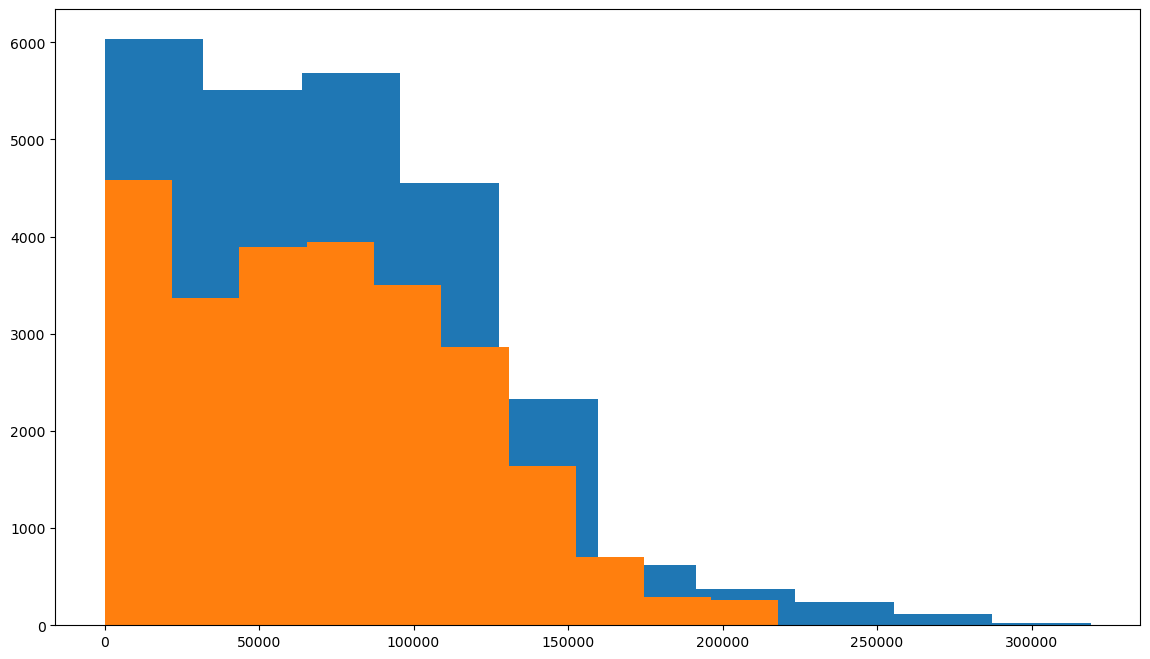

In [73]:
#################### data ######################
wage_data_non_outliers= non_outliers_data['prevailing_wage']
wage_data=visa_df['prevailing_wage']
#################### Non Outlier ###############
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal with outliers**
- 1. We can drop the outliers
    - Droping the outliers is an easy task, but not recommended
    - If you drop the outliers means, we are dropping the roew
    - which also means we are droping the other columns values also
    - May be some important information we might loose from column values
    - But in industry, if outlier percentage <= 2% of the total data, then we can drop
    - For Ex: The number of outliers in Prevailing wage is 427 and the total observations are 25480
    - The percentage is 1.67 which is less than 2%
- 2. Fill with Median value
    - We already know that outliers does not affect by median
    - So it is the best practice to fill the outliers with Median
- 3. Capping or Flooring
    - Instead of flling with Median, we can fiil with certian values
    - The outliers which are less than LB fill with LB values
    - The outliers which are greater than UB fill with UB values

- **Isolation  Forest**
- It is an ML model used to find the Outliers and Analmolies

In [74]:
print(42700/25480)

1.6758241758241759


**Fill with Median value**

In [ ]:
# This is done above

**np.where**

- In numpy we have method called where
- It takes three arguments
    - 1. Condition
    - 2. Value if condition is True
    - 3. Value if condirtion is False
- It is applicable only for Binary menas if an else

In [ ]:
# list1=[]
# for value in wage_date:
#     if value < LB or value > UP:
#         median=wage_data.median()
#         list1.append(median)
#     else:
#         list1.append(value)


In [84]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [85]:
# Question: I want to replace marks with 1, whch are greater than 100

list1=[]
for i in df.marks:
    if i > 100:
        list1.append(1)
    else:
        list1.append(i)
df['marks']=list1
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [82]:
# Using np.where() method

dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [83]:
np.where(df['marks']>100,1,df['marks'])

array([100,   1,   1], dtype=int64)

In [88]:
#Implement np.where for the outliers
wage_data = visa_df['prevailing_wage']
wage_median = wage_data.median()
condition1 = wage_data < lb
condition2 = wage_data > ub
l=np.where(condition1 | condition2, 
           wage_median, 
           wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [89]:
visa_df['prevailing_wage_updated'] = l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

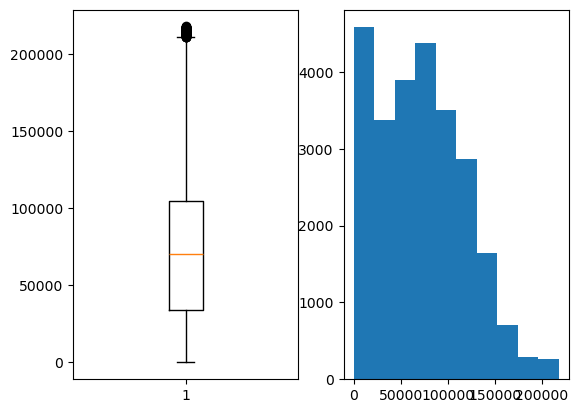

In [91]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_updated'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_updated'])